# protostars
## 06- `star_protostars.py` experiment 7
### IV. Experiment with variable exponent of reddening

`Starfish` with the `star_protostars_varAv.py` code

Full available spectral region

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp7/output/bb_absolute/run01/temp_emcee_chain.npy")

In [3]:
burned = ws[:, :,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_V$", r"$\lambda^X$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

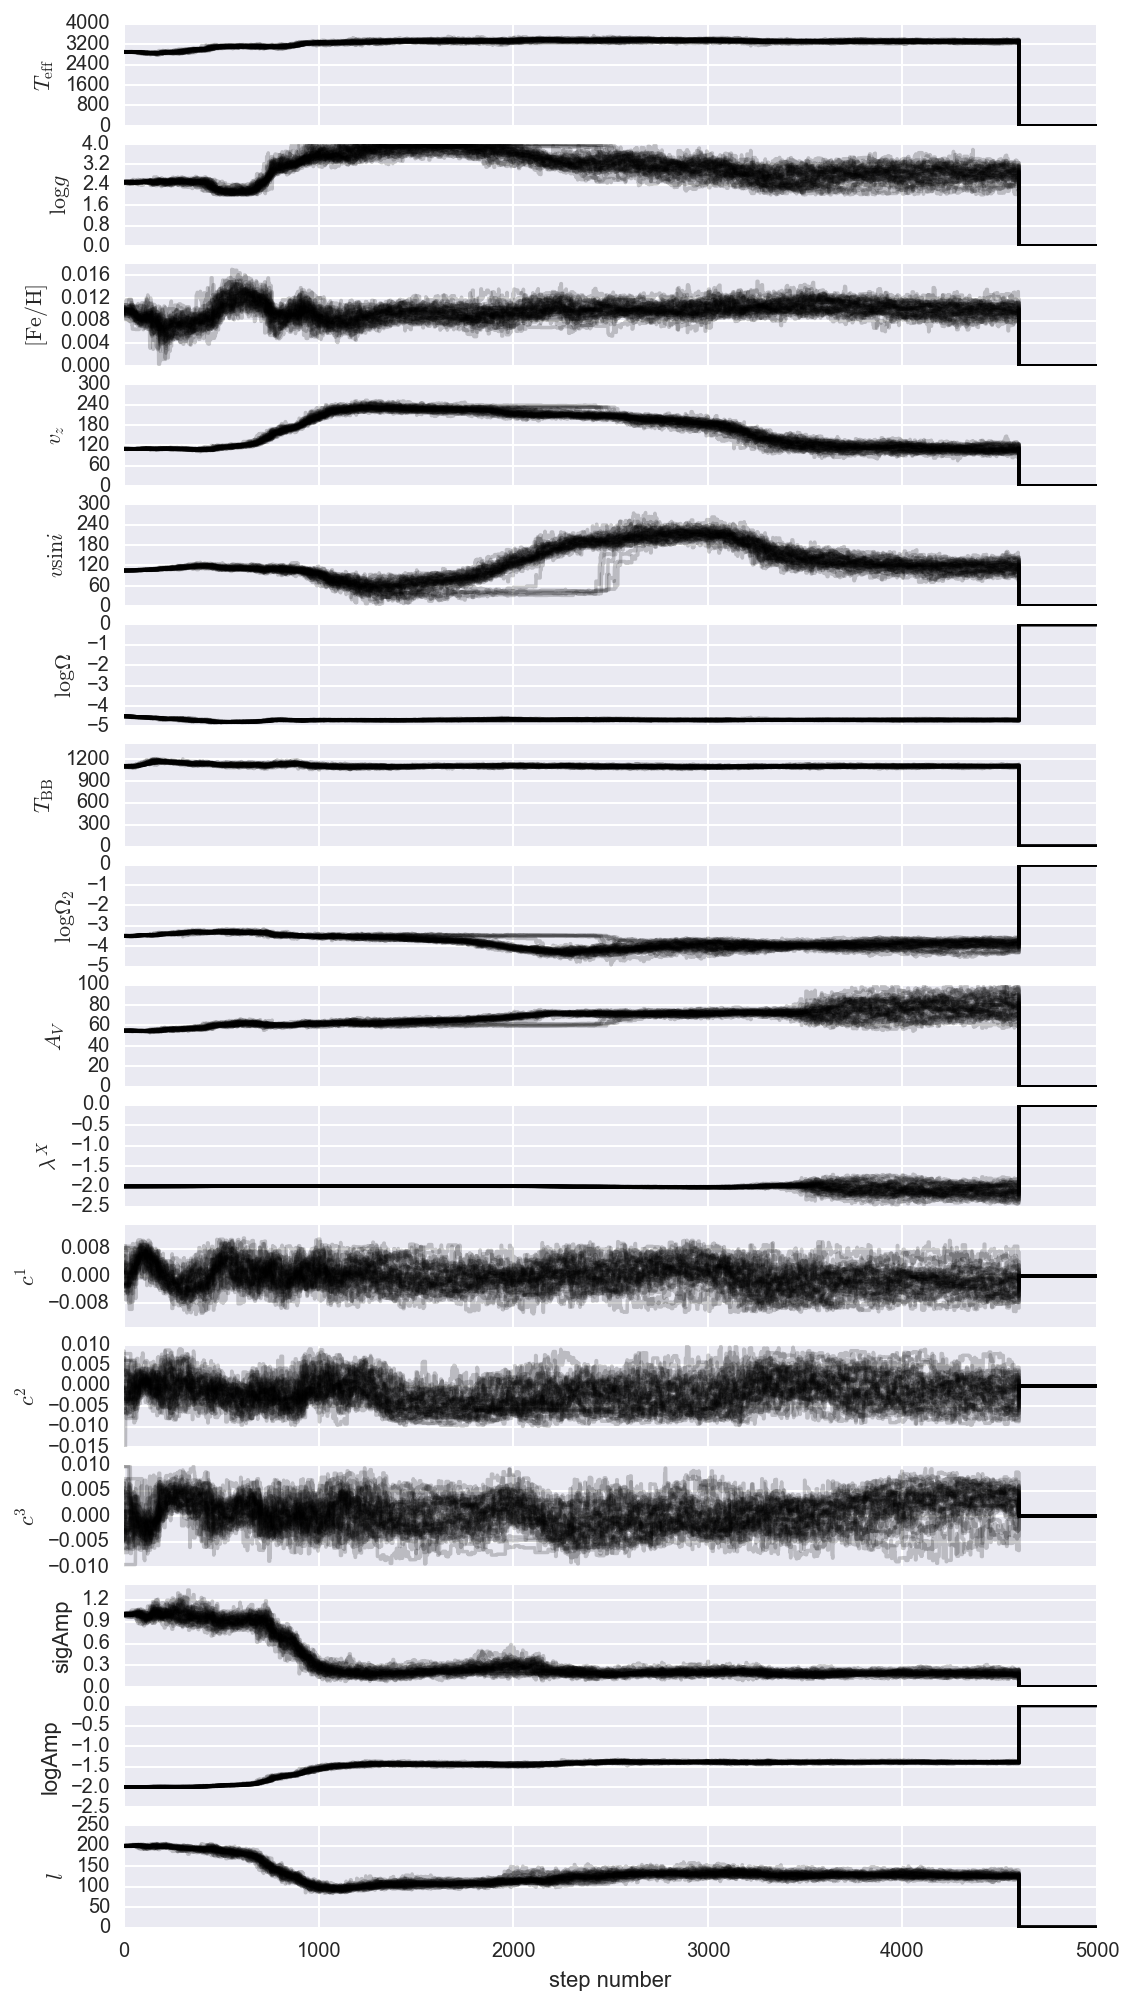

In [6]:
fig, axes = plt.subplots(16, 1, sharex=True, figsize=(8, 14))
for i in range(0, 16, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[15].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Metadata blobs problem again.

## Spectroscopy

In [8]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [26]:
raw_mods = np.load('../sf/exp7/output/bb_absolute/run01/raw_models.npy')

Does not work:

In [27]:
#raw_mods = np.load('../sf/exp7/output/bb_absolute/run01/temp_raw_models.npy')

In [28]:
raw_mods.shape

(10, 40)

In [29]:
raw_mods[0][3]

array([[ 0.46152934,  0.45315805,  0.44351168, ...,  0.93250125,
         0.92358171,  0.90455905],
       [ 0.08492573,  0.08510043,  0.08527539, ...,  0.35285129,
         0.35321537,  0.35357947],
       [ 0.46647673,  0.46730765,  0.46813953, ...,  1.67548044,
         1.6772348 ,  1.67899009],
       [ 0.99541992,  0.99541774,  0.99541573, ...,  0.9965571 ,
         0.99648544,  0.99641346]])

If the first sample works, the object can be a 4D numpy array:

In [30]:
#i=4990
#star, disk, scatAv, cheb = raw_mods[i,0,0,:], raw_mods[i,0,1,:], raw_mods[i,0,2,:], raw_mods[i,0,3,:]

If the first sample fails, you get a 2D list, some of which have empty fields:

In [31]:
star, disk, scatAv, cheb = (raw_mods[0][3][i, :] for i in range(4))

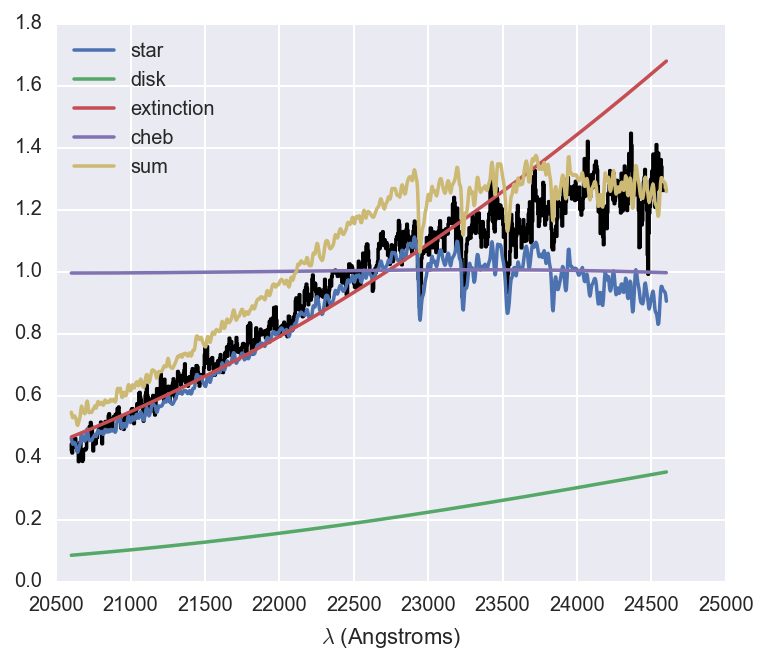

In [32]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, scatAv, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

The starting guess is adequate.